In [1]:
import dipy

In [2]:
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs

In [3]:
from fenics import *
from mshr import *
#from math import pi, sin, cos, sqrt
import math
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [4]:
fname = 'dMRI_data/ss-ras_data.nii.gz' 
bval_fname = 'dMRI_data/ss-ras.bval' 
bvec_fname = 'dMRI_data/ss-ras.bvec'

data, affine = load_nifti(fname)
bvals, bvecs = read_bvals_bvecs(bval_fname, bvec_fname)
print('data.shape (%d, %d, %d, %d)' % data.shape)

data_float = data.astype(np.float32)

dataMaxVal = int(max(data.flatten()))
dataMinVal = int(min(data.flatten()))

print('b values: ', bvals)
print('b vectors: ', bvecs)

data.shape (104, 104, 72, 32)
b values:  [  0. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700. 700. 700. 700.   0. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700.]
b vectors:  [[ 0.          0.          0.        ]
 [ 0.22293058 -0.49968055 -0.83703119]
 [-0.17871778 -0.49333411 -0.85128242]
 [-0.37542525 -0.14225766 -0.91587037]
 [ 0.41157657 -0.72193778 -0.556247  ]
 [ 0.19853516 -0.93616748 -0.29012811]
 [ 0.84751403 -0.52907634 -0.04240569]
 [ 0.73912424 -0.51868695 -0.42972025]
 [ 0.43850514 -0.15385152 -0.88546205]
 [ 0.75664991 -0.17243032 -0.63067305]
 [ 0.62896943 -0.74815804  0.21132247]
 [ 0.30347744 -0.94898587  0.0855993 ]
 [ 0.28489485 -0.54959691  0.78535217]
 [ 0.62077832 -0.54730117  0.56133366]
 [ 0.97062433 -0.19699152  0.13814011]
 [ 0.83273727 -0.20222756  0.51541471]
 [-0.03439669 -0.75075191  0.65968806]
 [-0.02572841 -0.94997877  0.31125325]
 [-0.68088585 -0.5256443   0.50999278]
 [-0.36761704 -0.53581387  0.76010603]
 [-

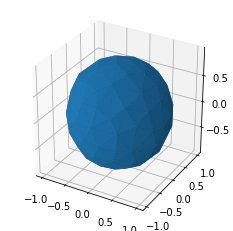

In [5]:
center = Point(0.0, 0.0, 0.0)
sphere = Sphere(center,1.0)
mesh = generate_mesh(sphere,5) # 20 specify the resolution of the mesh
plot(mesh)

In [6]:
# Mesh and function space
#sphere = Sphere(Point(0.0, 0.0, 0.0), 1.0)
#vmesh = generate_mesh(sphere, 20)
#mesh = BoundaryMesh(vmesh, "exterior")
#plot(mesh)

In [7]:
# Define DC boundary condition
#tol = 0.03
#def boundary1(x, on_boundary):
#    if abs(x[0]-bvecs[1][0]) < tol and abs(x[1]-bvecs[1][1]) < tol and abs(x[2]-bvecs[1][2]) < tol:
#        print("b vector 1: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[1][0]) < tol and abs(x[1]+bvecs[1][1]) < tol and abs(x[2]+bvecs[1][2]) < tol:
#        print("b vector 1: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[1][0]) < tol and abs(x[1]-bvecs[1][1]) < tol and abs(x[2]-bvecs[1][2]) < tol) or (abs(x[0]+bvecs[1][0]) < tol and abs(x[1]+bvecs[1][1]) < tol and abs(x[2]+bvecs[1][2]) < tol)

#def boundary14(x, on_boundary):
#    if abs(x[0]-bvecs[14][0]) < tol and abs(x[1]-bvecs[14][1]) < tol and abs(x[2]-bvecs[14][2]) < tol:
#        print("b vector 14: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[14][0]) < tol and abs(x[1]+bvecs[14][1]) < tol and abs(x[2]+bvecs[14][2]) < tol:
#        print("b vector 14: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[14][0]) < tol and abs(x[1]-bvecs[14][1]) < tol and abs(x[2]-bvecs[14][2]) < tol) or (abs(x[0]+bvecs[14][0]) < tol and abs(x[1]+bvecs[14][1]) < tol and abs(x[2]+bvecs[14][2]) < tol)

#def boundary17(x, on_boundary):
#    if abs(x[0]-bvecs[17][0]) < tol and abs(x[1]-bvecs[17][1]) < tol and abs(x[2]-bvecs[17][2]) < tol:
#        print("b vector 17: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[17][0]) < tol and abs(x[1]+bvecs[17][1]) < tol and abs(x[2]+bvecs[17][2]) < tol:
#        print("b vector 17: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[17][0]) < tol and abs(x[1]-bvecs[17][1]) < tol and abs(x[2]-bvecs[17][2]) < tol) or (abs(x[0]+bvecs[17][0]) < tol and abs(x[1]+bvecs[17][1]) < tol and abs(x[2]+bvecs[17][2]) < tol)

#def boundary20(x, on_boundary):
#    if abs(x[0]-bvecs[20][0]) < tol and abs(x[1]-bvecs[20][1]) < tol and abs(x[2]-bvecs[20][2]) < tol:
#        print("b vector 20: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[20][0]) < tol and abs(x[1]+bvecs[20][1]) < tol and abs(x[2]+bvecs[20][2]) < tol:
#        print("b vector 20: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[20][0]) < tol and abs(x[1]-bvecs[20][1]) < tol and abs(x[2]-bvecs[20][2]) < tol) or (abs(x[0]+bvecs[20][0]) < tol and abs(x[1]+bvecs[20][1]) < tol and abs(x[2]+bvecs[20][2]) < tol)

#def boundary22(x, on_boundary):
#    if abs(x[0]-bvecs[22][0]) < tol and abs(x[1]-bvecs[22][1]) < tol and abs(x[2]-bvecs[22][2]) < tol:
#        print("b vector 22: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[22][0]) < tol and abs(x[1]+bvecs[22][1]) < tol and abs(x[2]+bvecs[22][2]) < tol:
#        print("b vector 22: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[22][0]) < tol and abs(x[1]-bvecs[22][1]) < tol and abs(x[2]-bvecs[22][2]) < tol) or (abs(x[0]+bvecs[22][0]) < tol and abs(x[1]+bvecs[22][1]) < tol and abs(x[2]+bvecs[22][2]) < tol)

#def boundary29(x, on_boundary):
#    if abs(x[0]-bvecs[29][0]) < tol and abs(x[1]-bvecs[29][1]) < tol and abs(x[2]-bvecs[29][2]) < tol:
#        print("b vector 29: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    elif abs(x[0]+bvecs[29][0]) < tol and abs(x[1]+bvecs[29][1]) < tol and abs(x[2]+bvecs[29][2]) < tol:
#        print("b vector 29: ", x[0], x[1], x[2], sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))
#    return (abs(x[0]-bvecs[29][0]) < tol and abs(x[1]-bvecs[29][1]) < tol and abs(x[2]-bvecs[29][2]) < tol) or (abs(x[0]+bvecs[29][0]) < tol and abs(x[1]+bvecs[29][1]) < tol and abs(x[2]+bvecs[29][2]) < tol)

In [8]:
#V = FunctionSpace(mesh, "CG", 1)
V = FunctionSpace(mesh, "P", 1)

#bc1 = DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1)
#bc22 = DirichletBC(V, Constant(90.0), boundary22)
#bc14 = DirichletBC(V, Constant(10.0), boundary14)
#bc29 = DirichletBC(V, Constant(160.0), boundary29)
#bc17 = DirichletBC(V, Constant(200.0), boundary17)
#bc20 = DirichletBC(V, Constant(260.0), boundary20)

# Collect boundary conditions
#bcs = [DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1), DirichletBC(V, Constant(data_float[63,54,30,14]), boundary14)]
#bcs = [DirichletBC(V, Constant(data_float[63,54,30,1]), boundary1, method="pointwise"), 
#       DirichletBC(V, Constant(data_float[63,54,30,14]), boundary14, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,17]), boundary17, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,20]), boundary20, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,22]), boundary22, method="pointwise"),
#       DirichletBC(V, Constant(data_float[63,54,30,29]), boundary29, method="pointwise"),]

# get coordinates of DOFs
dof_coords = V.tabulate_dof_coordinates()
# find nearest DOF:
dof1 = np.argmin(np.linalg.norm(dof_coords - bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1, dof_coords[dof1]))
dof1_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[1], axis=1))
print('dof {}, x = {}'.format(dof1_sym, dof_coords[dof1_sym]))

dof14 = np.argmin(np.linalg.norm(dof_coords - bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14, dof_coords[dof14]))
dof14_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[14], axis=1))
print('dof {}, x = {}'.format(dof14_sym, dof_coords[dof14_sym]))

dof17 = np.argmin(np.linalg.norm(dof_coords - bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17, dof_coords[dof17]))
dof17_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[17], axis=1))
print('dof {}, x = {}'.format(dof17_sym, dof_coords[dof17_sym]))

dof20 = np.argmin(np.linalg.norm(dof_coords - bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20, dof_coords[dof20]))
dof20_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[20], axis=1))
print('dof {}, x = {}'.format(dof20_sym, dof_coords[dof20_sym]))

dof22 = np.argmin(np.linalg.norm(dof_coords - bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22, dof_coords[dof22]))
dof22_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[22], axis=1))
print('dof {}, x = {}'.format(dof22_sym, dof_coords[dof22_sym]))

dof29 = np.argmin(np.linalg.norm(dof_coords - bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29, dof_coords[dof29]))
dof29_sym = np.argmin(np.linalg.norm(dof_coords + bvecs[29], axis=1))
print('dof {}, x = {}'.format(dof29_sym, dof_coords[dof29_sym]))

# now define a DirichletBC at that point
bcs = [DirichletBC(V, Constant(data_float[63,54,30,1]),
                 'near(x[0], {x}) && near(x[1], {y}) && near(x[2], {z})'.format(x=dof_coords[dof1][0], y=dof_coords[dof1][1], z=dof_coords[dof1][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[63,54,30,1]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof1_sym][0], y=dof_coords[dof1_sym][1], z=dof_coords[dof1_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[63,54,30,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14][0], y=dof_coords[dof14][1], z=dof_coords[dof14][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[63,54,30,14]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof14_sym][0], y=dof_coords[dof14_sym][1], z=dof_coords[dof14_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[63,54,30,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17][0], y=dof_coords[dof17][1], z=dof_coords[dof17][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[63,54,30,17]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof17_sym][0], y=dof_coords[dof17_sym][1], z=dof_coords[dof17_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[63,54,30,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20][0], y=dof_coords[dof20][1], z=dof_coords[dof20][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[63,54,30,20]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof20_sym][0], y=dof_coords[dof20_sym][1], z=dof_coords[dof20_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[63,54,30,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22][0], y=dof_coords[dof22][1], z=dof_coords[dof22][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[63,54,30,22]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof22_sym][0], y=dof_coords[dof22_sym][1], z=dof_coords[dof22_sym][2]),
                 'pointwise'),
      
      DirichletBC(V, Constant(data_float[63,54,30,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29][0], y=dof_coords[dof29][1], z=dof_coords[dof29][2]),
                 'pointwise'),
      DirichletBC(V, Constant(data_float[63,54,30,29]),
                 'near(x[0], {x}) && near(x[1], {y})'.format(x=dof_coords[dof29_sym][0], y=dof_coords[dof29_sym][1], z=dof_coords[dof29_sym][2]),
                 'pointwise'),
     ]

#Test BC
#u_D = Expression('x[0]*x[0] + x[1]*x[1] - 2*x[2]*x[2]', degree=2)
#bcs = [DirichletBC(V, u_D, boundary1, method="pointwise"), 
#       DirichletBC(V, u_D, boundary14, method="pointwise"),
#       DirichletBC(V, u_D, boundary17, method="pointwise"),
#       DirichletBC(V, u_D, boundary20, method="pointwise"),
#       DirichletBC(V, u_D, boundary22, method="pointwise"),
#       DirichletBC(V, u_D, boundary29, method="pointwise"),]


u = TrialFunction(V) 
v = TestFunction(V)
w = Function(V)      

#r = Expression("x[0]", degree=1)
#theta = Expression("x[1]", degree=1)
#phi = Expression("x[2]", degree=1)

#r, phi, theta = SpatialCoordinate(mesh)
#x = r * sin(theta) * cos(phi)

#lamb = .6     
#f = Expression("lamb*(lamb + 1)*(sin(x[2]))**lamb*sin(lamb*x[1])", lamb=lamb) 
f = Constant(0.0)

#Weak formulation
#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx
#a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
#a = (a1+a2+a3)*dx

#a1 = (u.dx(0)*v.dx(0))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
#a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
#a5 = (Constant(2.)/r)*u.dx(0)*v
#a = (a1+a2+a3-a4-a5)*dx


#Different weak formulation
x = SpatialCoordinate(mesh)
# Defining spherical coordinates
r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
phi = Expression("atan2(x[1],x[0])", degree=2)
theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
a1 = (u.dx(0)*v.dx(0))
a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(2)*v
a5 = (Constant(2.)/r)*u.dx(0)*v
a = (a1+a2+a3-a4-a5)*dx
##a = (a1+a2+a3)*dx

#x = SpatialCoordinate(mesh)
## Defining spherical coordinates
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2])", degree=2)
##theta = Expression("atan2(x[1],x[0])", degree=2)
##phi = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#phi = Expression("atan2(x[1],x[0])", degree=2)
#theta = Expression("acos(x[2]/sqrt(x[0]*x[0]+x[1]*x[1]+x[2]*x[2]))", degree=2)
#a1 = (u.dx(0)*v.dx(0))
##a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
##a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
#a2 = ((Constant(1.)/r)**2)*(u.dx(1)*v.dx(1))
#a3 = (Constant(1.)/(r*sin(theta))**2)*(u.dx(2)*v.dx(2))
#a4 = (cos(theta)/(sin(theta)*r**2))*u.dx(1)*v
#a5 = (Constant(2.)/r)*u.dx(0)*v
#a = (a1+a2+a3-a4-a5)*dx


#Different weak formulation
#a1 = (Constant(1.0)+((cos(theta)/sin(theta))-1)*cos(phi)**2)*(u.dx(0)*v.dx(0))
#a2 = u.dx(1)*v.dx(1)
#a3 = (cos(phi)**2+(sin(phi)**2/sin(theta)**2))*(u.dx(2)*v.dx(2))
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12)*dx


#Different weak formulation
#a1 = u.dx(0)*v.dx(0)
#a2 = u.dx(1)*v.dx(1)
#a3 = u.dx(2)*v.dx(2)
#a4 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(0)*v.dx(1))
#a5 = ((-cos(theta)/sin(theta))*cos(phi)*cos(theta)*sin(phi))*(u.dx(0)*v.dx(2))
#a6 = (cos(phi)**2*(cos(theta)/sin(theta)))*(u.dx(1)*v.dx(0))
#a7 = (cos(phi)*sin(theta)*sin(phi)-(sin(phi)/sin(theta)))*(u.dx(1)*v.dx(2))
#a8 = ((-cos(theta)/sin(theta))**2*cos(theta)*sin(phi)*cos(phi))*(u.dx(2)*v.dx(0))
#a9 = (-sin(phi)*cos(phi)*cos(theta)*(cos(theta)/sin(theta)))*(u.dx(2)*v.dx(1))
#a10 = (-cos(theta)*sin(phi)/r)*u.dx(0)*v
#a11 = ((Constant(2.)*sin(theta)**2+cos(theta))*(-sin(phi)/(r*sin(theta))))*u.dx(1)*v
#a12 = (cos(phi)*Constant(-2.)/r)*u.dx(2)*v
#a = (a1+a2+a3+a10+a11+a12)*dx

#L = inner(f,v)*dx
L = f*v*dx
#L = Constant(0.0)

#for bc in bcs: 
#    bc.apply(a,L)
    
#solve(a == L, w, bc)
#solve(a == L, w, bcs)

dof 13, x = [ 0.42747702 -0.53367204 -0.71852473]
dof 72, x = [-0.38085338  0.46390935  0.7917815 ]
dof 30, x = [ 0.99292988 -0.1103258   0.01425452]
dof 40, x = [-0.95441084  0.2625887  -0.13642792]
dof 105, x = [-0.01274199 -0.98594668  0.15063504]
dof 46, x = [-0.11058538  0.95854009 -0.2538013 ]
dof 5, x = [-0.24358289  0.01206781 -0.96891432]
dof 92, x = [ 0.02054429 -0.14103376  0.9872363 ]
dof 95, x = [-0.27320212 -0.3102524   0.90746593]
dof 1, x = [ 0.16777894  0.20418909 -0.95977709]
dof 53, x = [-0.8852275  -0.45345384 -0.0297284 ]
dof 28, x = [0.83425823 0.52218495 0.14099679]
Calling FFC just-in-time (JIT) compiler, this may take some time.
           Consider using the option 'quadrature_degree' to reduce the number of points
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


AttributeError: 'dolfin.cpp.la.Matrix' object has no attribute 'get_local'

In [ ]:
# Save solution to file in VTK format
vtkfile = File('LH/solution.pvd')
vtkfile << w

In [ ]:
array_u = nodal_values_u = w.vector()
vertex_values_u = w.compute_vertex_values()

In [ ]:
print(array_u)

In [ ]:
for i in range(len(array_u)):
    print(array_u[i])

In [ ]:
min(array_u)

In [ ]:
len(array_u)

In [ ]:
bvecs[1][0]

In [ ]:
bvecs[1][2]

In [ ]:
data_float[63,54,30,1]

In [ ]:
data_float[63,54,30,14]

In [ ]:
data_float[63,54,30,17]

In [ ]:
data_float[63,54,30,20]

In [ ]:
data_float[63,54,30,22]

In [ ]:
data_float[63,54,30,29]

In [ ]:
#error_L2 = errornorm(u_D, w, 'L2')
#vertex_values_u_D = u_D.compute_vertex_values(mesh)
#vertex_values_u = w.compute_vertex_values(mesh)
#error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))
#print(error_max)
#print(error_L2)

In [ ]:
bvecs[27]

In [ ]:
x_point = Point(*[bvecs[27]])
mesh.bounding_box_tree().compute_first_entity_collision(x_point)

In [ ]:
#mesh.bounding_box_tree().compute_closest_point(x_point)

In [ ]:
def project_point_onto_affine_subspace(p, V):
    """Projects a point onto an affine subspace

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points / affine subspaces
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of affine subspace

    For a single point / affine subspace:
        - p is the point in R^N to be projected onto the affine subspace
        - The affine subspace is the set of all affine combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points / affine subspaces, each point is
    projected onto its corresponding affine subspace
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith affine subspace

    Example usage:
        import numpy as np
        spatial_dim = 3
        p1 = np.random.randn(spatial_dim)
        V1 = np.array([[2., 0., 0.],
                      [2., 1., 0.],
                      [2., 0., 1.]])
        p2 = np.random.randn(spatial_dim)
        V2 = np.array([[0., 3., 0.],
                       [1., 3., 0.],
                       [0., 3., 1.]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p, affine_coordinates = project_point_onto_affine_subspace(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        print('p1=', p1)
        print('projected_p1=', projected_p1)
        print('p2=', p2)
        print('projected_p2=', projected_p2)
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    if k == 1:
        affine_coordinates = np.ones((num_pts, 1))
    else:
        VV0 = VV[:, 0, :].reshape((num_pts, 1, N))
        dVV = VV[:, 1: :].reshape((num_pts, k-1, N)) - VV0
        dPP = PP.reshape((num_pts, 1, N)) - VV0

        if k == 2:
            PHI = np.sum(dVV * dVV, axis=-1).reshape((num_pts))
            RHS = np.sum(dVV * dPP, axis=-1).reshape((num_pts))
            cc_rest = (RHS / PHI).reshape((num_pts, 1))
        else:
            PHI = np.einsum('xiz,xjz->xij', dVV, dVV) # shape = (num_pts, k-1, k-1)
            iPHI = np.linalg.inv(PHI) # shape = (num_pts, k-1, k-1)

            RHS = np.sum(dVV * dPP, axis=-1)  # shape = (num_pts, k-1)
            cc_rest = np.einsum('pij,pj->pi', iPHI, RHS)  # shape = (num_pts, k-1)

        cc_first = (1. - np.sum(cc_rest, axis=1)).reshape((num_pts, 1))
        affine_coordinates = np.concatenate([cc_first, cc_rest], axis=1) # shape = (num_pts, k)

    PP_projected = np.einsum('pi,pij->pj', affine_coordinates, VV) # shape = (num_pts, N)

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
        affine_coordinates = affine_coordinates.reshape(-1)
    return PP_projected, affine_coordinates

def powerset(s):
    # NOT MY CODE. FROM USER "hughdbrown" ON STACKOVERFLOW HERE:
    # https://stackoverflow.com/a/1482320/484944
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

def closest_point_on_simplex(p, V):
    """Projects a point onto a simplex (triangle, tetrahedron, etc)

    p.shape = (N,)   OR (num_pts, N) for vectorization over many points/simplices
    V.shape = (k, N) OR (num_pts, k, N) for vectorization

    N = dimension of ambient space
    k-1 = dimension of simplex

    For a single point/simplex:
        - p is the point in R^N to be projected onto the simplex
        - The simplex is the set of all convex combinations
        of rows, V[i,:], of the matrix V

    Vectorization:
    For many points/simplices, each point is
    projected onto its corresponding simplex
        p[i,:] is the ith point
        V[i,:,:] is the matrix defining the ith simplex

    Example usage:
        import numpy as np
        import matplotlib.pyplot as plt
        p1 = np.array([1.1, 0.4])
        V1 = np.array([[0., 0.],
                       [0., 1.],
                       [1., 0.]])
        p2 = np.array([-0.3, 1.1])
        V2 = np.array([[-1.0, 0.],
                       [0.,   0.],
                       [-0.5, 0.5]])
        p = np.stack([p1, p2])
        V = np.stack([V1, V2])
        projected_p = closest_point_on_simplex(p, V)
        projected_p1 = projected_p[0,:]
        projected_p2 = projected_p[1,:]
        plt.figure()
        t1 = plt.Polygon(V1)
        plt.gca().add_patch(t1)
        plt.plot([p1[0], projected_p1[0]],
                 [p1[1], projected_p1[1]], 'r')
        t2 = plt.Polygon(V2)
        plt.gca().add_patch(t2)
        plt.plot([p2[0], projected_p2[0]],
                 [p2[1], projected_p2[1]], 'r')
        plt.gca().set_aspect('equal')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p.reshape((1, p.shape[0]))
        VV = V.reshape((1, V.shape[0], V.shape[1]))
    else:
        PP = p
        VV = V
    num_pts, k, N = VV.shape

    subsets = list(powerset(list(range(k)))) # e.g., [[], [0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]]
    QQ = list()
    CC = list()
    for s in subsets:
        if s:
            simplicial_facet = VV[:,s,:]
            Q, C = project_point_onto_affine_subspace(PP, simplicial_facet)
            QQ.append(Q)
            CC.append(C)

    distances = np.stack([np.linalg.norm(Q - PP, axis=-1) for Q in QQ]) # shape=(num_facets, num_pts)

    good_inds = np.stack([(np.all(0. <= C, axis=1) & np.all(C <= 1., axis=1)) for C in CC]) # shape=(num_facets, num_pts)
    bad_inds = np.logical_not(good_inds)
    distances[bad_inds] = np.inf
    closest_inds = np.expand_dims(np.argmin(distances[:, :, None], axis=0), axis=0)

    QQ_stack = np.stack(QQ) # shape=(num_facets, num_pts, N)
    PP_projected = np.take_along_axis(QQ_stack, closest_inds, axis=0)[0,:,:]

    if len(p.shape) == 1:
        PP_projected = PP_projected.reshape(-1)
    return PP_projected

def closest_point_in_mesh(p, mesh):
    """Finds the nearest point in a mesh to a given point
    p is the point or points (numpy array)
    mesh is the fenics/dolfin mesh

    p.shape = (N,) OR (num_pts, N) for vectorization over many points
    N = dimension of ambient space

    Example usage:
        import numpy as np
        import dolfin as dl
        import matplotlib.pyplot as plt
        mesh = dl.UnitSquareMesh(13,9)
        num_pts = 20
        p = np.random.randn(num_pts, 2) + np.array([0.5, 0.5])
        closest_p = closest_point_in_mesh(p, mesh)
        plt.figure()
        dl.plot(mesh)
        for ii in range(num_pts):
            plt.plot([p[ii,0], closest_p[ii,0]], [p[ii,1], closest_p[ii,1]], 'b')
            plt.plot(p[ii,0], p[ii,1], '*k')
            plt.plot(closest_p[ii,0], closest_p[ii,1], '.r')
        plt.show()
    """
    if len(p.shape) == 1:
        PP = p[None,:]
    else:
        PP = p
    num_pts, N = PP.shape
    tdim = mesh.topology().dim()
    k = tdim + 1

    VV = np.zeros((num_pts, k, N))
    bbt = mesh.bounding_box_tree()
    for ii in range(num_pts):
        pi = PP[ii,:]
        closest_entity, closest_distance = bbt.compute_closest_entity(Point(pi))
        closest_cell = mesh.cells()[closest_entity]
        vertices_of_closest_cell = mesh.coordinates()[closest_cell, :]
        VV[ii, :, :] = vertices_of_closest_cell

    closest_PP = closest_point_on_simplex(PP, VV)

    if len(p.shape) == 1:
        closest_PP = closest_PP.reshape(-1)
    return closest_PP

In [ ]:
closest_p = closest_point_in_mesh(bvecs[27], mesh)
print(bvecs[27])
print(closest_p)
print(w(closest_p))

In [ ]:
closest_p = closest_point_in_mesh(-bvecs[27], mesh)
print(-bvecs[27])
print(closest_p)
print(w(closest_p))